In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
intervals = np.array([(1, 3),
                      (2, np.inf),
                      (-np.inf, 4),
                      (5, 6)])

In [3]:
def adjust_intervals(intervals, margin):
    adjusted_intervals = intervals + np.array([margin, -margin])
    mask = adjusted_intervals[:, 1] < adjusted_intervals[:, 0]
    adjusted_intervals[mask] = adjusted_intervals[mask][:, ::-1]
    return adjusted_intervals

In [4]:
def getting_best_mu(intervals, margin, loss_type='linear'):
    intervals = adjust_intervals(intervals, margin)
    endpoints = np.unique(intervals[np.isfinite(intervals)])
    y_min, y_max = intervals[:, 0], intervals[:, 1]
    lower_loss = np.maximum(0, y_min[:, None] - endpoints)  # Loss when mu is below y_min
    upper_loss = np.maximum(0, endpoints - y_max[:, None])  # Loss when mu is above y_max
    if loss_type == 'squared':
        lower_loss = lower_loss ** 2
        upper_loss = upper_loss ** 2
    losses = np.sum(lower_loss + upper_loss, axis=0)
    min_loss_idx = np.argmin(losses)
    mu = endpoints[min_loss_idx]
    return mu

In [5]:
best_mu_linear  = getting_best_mu(intervals, 0.2, loss_type='linear')
best_mu_squared = getting_best_mu(intervals, 0.2, loss_type='squared')

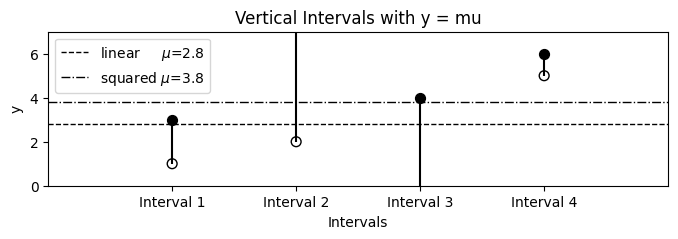

In [6]:
# Determine plot y-limits based on finite bounds
finite_bounds = [
    bound for lower, upper in intervals for bound in (lower, upper)
    if not np.isinf(bound)
]
ymin = min(finite_bounds) - 1  # Add margin
ymax = max(finite_bounds) + 1  # Add margin

# Plot the intervals
fig, ax = plt.subplots(figsize=(8, 2))

for i, (lower, upper) in enumerate(intervals):
    # Handle -inf and +inf bounds
    plot_lower = lower if not np.isneginf(lower) else ymin
    plot_upper = upper if not np.isposinf(upper) else ymax
    
    # Plot vertical line for the interval
    ax.vlines(x=i, ymin=plot_lower, ymax=plot_upper, color='black', linewidth=1.5)
    
    # Add markers for finite bounds only
    if not np.isneginf(lower):
        ax.scatter(i, lower, color='black', edgecolors='black', facecolors='none', s=50)  # Hollow point
    if not np.isposinf(upper):
        ax.scatter(i, upper, color='black', s=50)  # Solid point

# Plot the horizontal dashed line for mu
ax.axhline(y=best_mu_linear,  color='black', linestyle='--', linewidth=1, label=f'linear     $\mu$={best_mu_linear}')
ax.axhline(y=best_mu_squared, color='black', linestyle='-.', linewidth=1, label=f'squared $\mu$={best_mu_squared}')

# Styling the plot
ax.set_xlim(-1, len(intervals))  # Limit x-axis to fit all intervals
ax.set_ylim(ymin, ymax)  # Use dynamic y-limits
ax.set_xticks(range(len(intervals)))
ax.set_xticklabels([f"Interval {i+1}" for i in range(len(intervals))])  # Label intervals
ax.legend()
ax.set_title("Vertical Intervals with y = mu")
ax.set_xlabel("Intervals")
ax.set_ylabel("y")

plt.show()